In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import numpy as np

In [56]:
IMG_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCH=20

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH_SIZE)


Found 2152 files belonging to 3 classes.


In [4]:
print(dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
class_names=dataset.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)


68

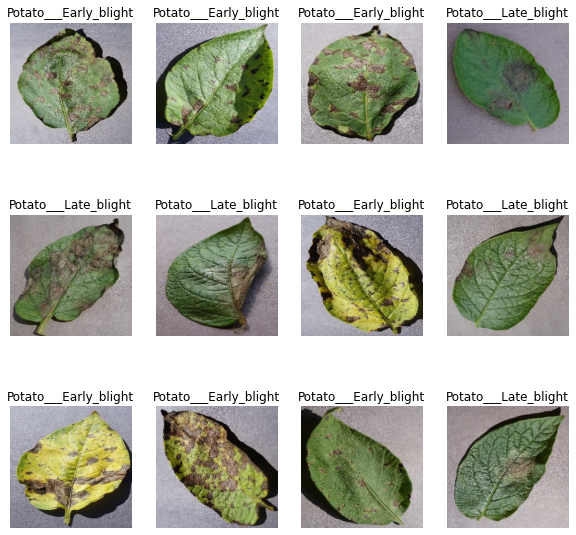

In [8]:
plt.figure(figsize=(10,10))
for x,y in dataset.take(1):
    for i in range(12):
       ax=plt.subplot(3,4,i+1)
       plt.imshow(x[i].numpy().astype("uint8"))
       plt.title(class_names[y[i]])
       plt.axis("off")

## 80% training
### 20% testing
## 10% validation
## 10% testing

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54) #first 54
test_ds=dataset.skip(54) # remaining after 54


In [11]:
val_size=0.1 #validation 10%
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds=test_ds.take(6)

In [13]:
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)

In [15]:
len(test_ds)

8

In [16]:
#Alternative method is:
def data_split(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=data_split(dataset)

In [31]:
len(test_ds)

8

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #store the recent image in the memory and time efficiency

val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # all of these will make our training run fast
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [21]:
data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# USING CNN FOR MODEL BUILDING

In [22]:
inp_size=(BATCH_SIZE,IMG_SIZE,IMG_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, (3,3), activation='relu',input_shape=inp_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])
model.build(input_shape=inp_size)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [57]:
history=model.fit(train_ds,epochs=EPOCH,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=val_ds)

Epoch 1/20
54/54 [==============================] - 88s 2s/step - loss: 0.1158 - accuracy: 0.9566 - val_loss: 0.4917 - val_accuracy: 0.8698
Epoch 2/20
54/54 [==============================] - 91s 2s/step - loss: 0.1264 - accuracy: 0.9537 - val_loss: 0.1336 - val_accuracy: 0.9427
Epoch 3/20
54/54 [==============================] - 94s 2s/step - loss: 0.1146 - accuracy: 0.9583 - val_loss: 0.5328 - val_accuracy: 0.8333
Epoch 4/20
54/54 [==============================] - 93s 2s/step - loss: 0.1044 - accuracy: 0.9664 - val_loss: 0.2493 - val_accuracy: 0.8958
Epoch 5/20
54/54 [==============================] - 91s 2s/step - loss: 0.0645 - accuracy: 0.9757 - val_loss: 0.5246 - val_accuracy: 0.8542
Epoch 6/20
54/54 [==============================] - 92s 2s/step - loss: 0.1311 - accuracy: 0.9572 - val_loss: 0.1515 - val_accuracy: 0.9219
Epoch 7/20
54/54 [==============================] - 93s 2s/step - loss: 0.0571 - accuracy: 0.9815 - val_loss: 0.1235 - val_accuracy: 0.9479
Epoch 8/20
54/54 [==

In [58]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 4s 488ms/step - loss: 0.1138 - accuracy: 0.9609


first image to predict
first image's actual label: Potato___Late_blight
Potato___Late_blight


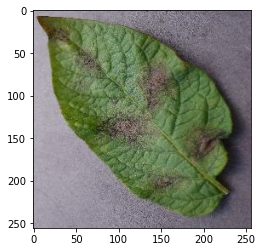

In [59]:
for x,y in test_ds.take(1):
    first_img=x[10].numpy().astype('uint8')
    first_label=y[10].numpy()
    print("first image to predict")
    plt.imshow(first_img)
    print("first image's actual label:",class_names[first_label])
    prediction=model.predict(x)
    print(class_names[np.argmax(prediction[0])])
    
    

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

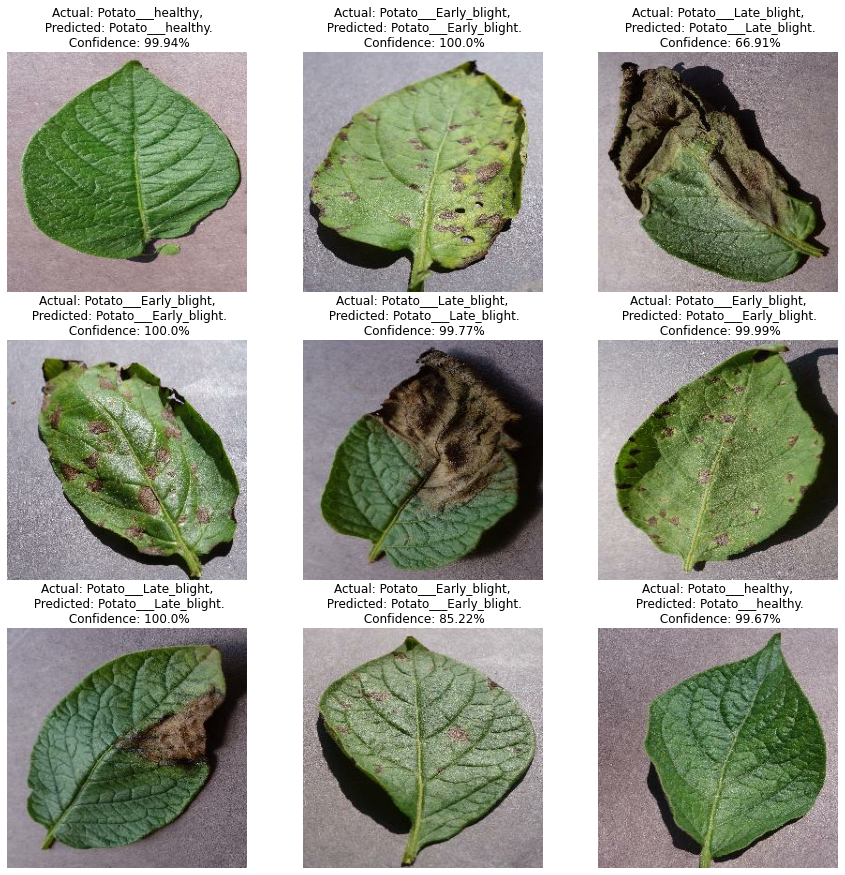

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [64]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets
